In [1]:
import theano
theano.config.exception_verbosity='high'

In [1]:
import converter
from model import SSDModel
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
%matplotlib inline
ROOT = '/home/nik-kochetov/work/'

Using Theano backend.


In [2]:
model = SSDModel()

(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
skip weight for: block4_pool
skip weight for: block5_conv1
skip weight for: block5_conv2
skip weight for: block5_conv3
skip weight for: block5_pool


In [89]:
path = os.path.join(ROOT, 'models_g2_0', 'model.25-12-2017.gen2.ssd.02.hdf5')
model.model.load_weights(path)

In [90]:
imgs_path = os.path.join(ROOT, 'Barcodes', 'Images')
imgs = os.listdir(imgs_path)
print imgs[:10]

['Code_39_Check_0313_58.jpg', 'Code_39_0146_7.jpg', 'EAN_13_5sup_0083_4.jpg', 'Interleaved_2_of_5_(3)_0125_128.jpg', 'Code_39_0215_10.jpg', 'Code_39_0382_41.jpg', 'Code_128C_0311_31.jpg', 'Code_39_0198_11.jpg', 'Code_128A_0116_15.jpg', 'Code_39_Check_0173_56.jpg']


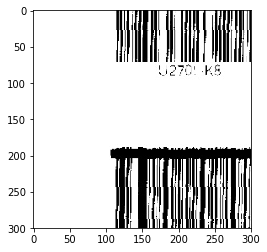

In [91]:
#img_name = '../../Images/r_1.jpg' 
#img_name = 'Code_128B_0348_65.jpg'
img_name = imgs[4]
curr_img_path = os.path.join(imgs_path, img_name)
img = np.asarray(Image.open(curr_img_path))
imshow(img)

In [92]:
img.shape

(300, 300, 3)

In [93]:
img_2 = image.load_img(curr_img_path, target_size=(300, 300))
img_2 = image.img_to_array(img)
img_2 = img_2.reshape([1] + list(img_2.shape))
img_2 = preprocess_input(img_2)

In [94]:
tensor = model.model.predict(img_2) #img.reshape([1]  + list(img.shape)))

In [95]:
for val in tensor:
    print val.shape
    print val[np.nonzero(val)]

(1, 37, 37, 1)
[-1. -1. -1. ..., -1.  1.  1.]
(1, 37, 37, 1)
[-1. -1. -1. ...,  1.  1.  1.]
(1, 37, 37, 1)
[ 1. -1.  1. ..., -1. -1. -1.]
(1, 37, 37, 1)
[ 1.         -0.99712229  1.         ..., -1.         -1.         -1.        ]
(1, 37, 37, 1)
[ 1.          1.          1.         ..., -0.99999976  1.          1.        ]
(1, 37, 37, 1)
[-1.         -1.         -1.         ..., -1.         -0.99999738
  0.97637212]
(1, 37, 37, 1)
[ 1.          1.          1.         ..., -1.          1.         -0.97122061]
(1, 37, 37, 1)
[ 1.  1.  1. ...,  1.  1.  1.]
(1, 37, 37, 1)
[ 1. -1. -1. ...,  1.  1. -1.]
(1, 37, 37, 1)
[ 1. -1. -1. ...,  1.  1.  1.]
(1, 37, 37, 1)
[ 1.          1.          1.         ...,  1.          1.         -0.99879849]
(1, 37, 37, 1)
[ 1.  1.  1. ...,  1.  1. -1.]
(1, 37, 37, 1)
[-1.          1.         -0.99999946 ..., -1.         -1.         -1.        ]
(1, 37, 37, 1)
[ 1. -1.  1. ...,  1. -1.  1.]
(1, 37, 37, 1)
[-1.          1.          1.         ...,  1.       

In [10]:
print np.sort(tensor[0][np.nonzero(tensor[0])])

[-1. -1. -1. ...,  1.  1.  1.]


In [96]:
reload(converter)
from converter import Converter
conv = Converter(os.path.join(ROOT, 'Barcodes', 'Rects'))

import predictor
reload(predictor)
from predictor import Predictor
ssd_predictor = Predictor(model, conv)

In [97]:
#conv = Converter(os.path.join(ROOT, 'Barcodes', 'Rects'))
rects = ssd_predictor.predict(curr_img_path, top=3)

for rect in rects:
    print rect.conf
    rect.rect.dump()

37 37
(1, 37, 37, 1)
[(0.0, <rect.Rect instance at 0x7f595bd64b90>), (0.0, <rect.Rect instance at 0x7f595bd64d88>), (0.0, <rect.Rect instance at 0x7f595a82a6c8>)]
37 37
(1, 37, 37, 1)
[(0.0, <rect.Rect instance at 0x7f595bd64b90>), (0.0, <rect.Rect instance at 0x7f595bd64d88>), (0.0, <rect.Rect instance at 0x7f595a82a6c8>), (0.0, <rect.Rect instance at 0x7f595c65c518>), (0.0, <rect.Rect instance at 0x7f595c65cfc8>), (0.0, <rect.Rect instance at 0x7f595be19758>)]
37 37
(1, 37, 37, 1)
2.54747e-38
8.42128e-35
1.40514e-34
4.48072e-34
1.74506e-35
1.82981e-31
1.95672e-31
6.14001e-32
2.53722e-33
1.65649e-30
1.53049e-30
9.33116e-32
4.28427e-33
1.74703e-30
1.67557e-30
9.33116e-32
4.28427e-33
1.74703e-30
1.67544e-30
9.33116e-32
4.28427e-33
1.74703e-30
1.67554e-30
9.33116e-32
4.28427e-33
1.74703e-30
1.6758e-30
3.92099e-38
9.33116e-32
4.28427e-33
1.74703e-30
1.67614e-30
2.30259e-33
9.33116e-32
4.28427e-33
1.74703e-30
1.67645e-30
1.4472e-31
2.36934e-38
9.33116e-32
4.28427e-33
1.74703e-30
1.67667e-3

4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f595bd254d0>), (0.0, <rect.Rect instance at 0x7f595bd25b48>), (0.0, <rect.Rect instance at 0x7f595bd25200>)]
4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f595bd254d0>), (0.0, <rect.Rect instance at 0x7f595bd25b48>), (0.0, <rect.Rect instance at 0x7f595bd25200>), (0.0, <rect.Rect instance at 0x7f595bd25830>), (0.0, <rect.Rect instance at 0x7f595bd25cf8>), (0.0, <rect.Rect instance at 0x7f595bd25170>)]
4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f595bd254d0>), (0.0, <rect.Rect instance at 0x7f595bd25b48>), (0.0, <rect.Rect instance at 0x7f595bd25200>), (0.0, <rect.Rect instance at 0x7f595bd25170>), (0.0, <rect.Rect instance at 0x7f595bd25cf8>), (0.0, <rect.Rect instance at 0x7f595bd25830>)]
4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f595bd254d0>), (0.0, <rect.Rect instance at 0x7f595bd25b48>), (0.0, <rect.Rect instance at 0x7f595bd25200>), (0.0, <rect.Rect instance at 0x7f595bd25830>), (0.0, <rect.Rect instance at 0x7f59

l=6.6407028648,t=-117.915729243,r=179.845783622,b=401.699513027
None
l=-1.46740524331,t=-117.915729243,r=171.737675514,b=401.699513027
None
l=-9.57551335142,t=-109.807621135,r=163.629567405,b=409.807621135
None


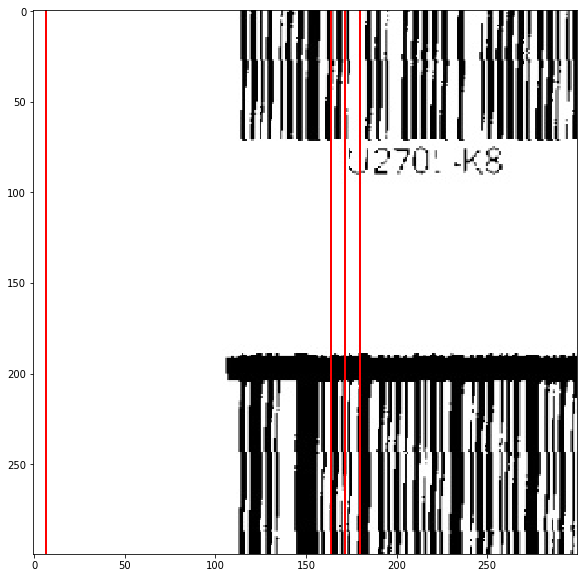

In [99]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 10))

# Display the image
ax.imshow(img)

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)


for rect in rects[:3]:
    # Create a Rectangle patch
    rr = rect.rect.copy()
    #rr.stretch(300, 300)
    print rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=2,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()